In [27]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [28]:
dataset = pd.read_csv('Datasets/salaries_clean.csv')
dataset

,Year,Company,City,State,Title,Area,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
0,2017,Oracle,Redwood City,CA,Product Manager,NaN,127000,1.5,1.5,107000,20000.0,10000.0,0,0,0,0,0
1,2017,eBay,San Francisco,CA,Software Engineer,NaN,100000,5.0,3.0,0,0.0,0.0,0,0,0,0,0
2,2017,Amazon,Seattle,WA,Product Manager,NaN,310000,8.0,0.0,155000,0.0,0.0,0,0,0,0,0
3,2017,Apple,Sunnyvale,CA,Software Engineering Manager,NaN,372000,7.0,5.0,157000,180000.0,35000.0,0,0,0,0,0
4,2017,Microsoft,Mountain View,CA,Software Engineer,NaN,157000,5.0,3.0,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52834,2018,Google,Seattle,WA,Software Engineer,Distributed Systems (Back-End),327000,10.0,1.0,155000,150000.0,22000.0,0,0,0,0,0
52835,2018,Microsoft,Redmond,WA,Software Engineer,Full Stack,237000,2.0,2.0,146900,73200.0,16000.0,0,0,0,0,0
52836,2018,MSFT,Seattle,WA,Software Engineer,Full Stack,220000,14.0,12.0,157000,25000.0,20000.0,0,0,0,0,0
52837,2018,Salesforce,San Francisco,CA,Software Engineer,iOS,280000,8.0,4.0,194688,57000.0,29000.0,0,0,0,0,0


In [29]:
dataset.describe ()

,Year,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
count,52839.000000,5.283900e+04,52839.000000,52839.000000,5.283900e+04,5.283900e+04,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000
mean,2020.005167,2.353985e+05,7.242433,2.754126,1.475888e+05,5.700889e+04,20977.710474,0.244157,0.179337,0.030924,0.003918,0.005583
std,0.921413,1.376577e+05,5.955109,3.340259,5.740906e+04,8.639762e+04,27987.338795,0.429590,0.383638,0.173114,0.062468,0.074511
min,2017.000000,1.100000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1.530000e+05,3.000000,0.000000,1.200000e+05,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,2.000000e+05,6.000000,2.000000,1.470000e+05,2.900000e+04,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,2.800000e+05,10.000000,4.000000,1.750000e+05,7.500000e+04,29000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
ds = pd.read_csv("Datasets/salaries_clean.csv", usecols = ['Area', 'Total Annual Compensation'])
ds

,Area,Total Annual Compensation
0,NaN,127000
1,NaN,100000
2,NaN,310000
3,NaN,372000
4,NaN,157000
...,...,...
52834,Distributed Systems (Back-End),327000
52835,Full Stack,237000
52836,Full Stack,220000
52837,iOS,280000


ValueError: could not convert string to float: 'Full Stack'

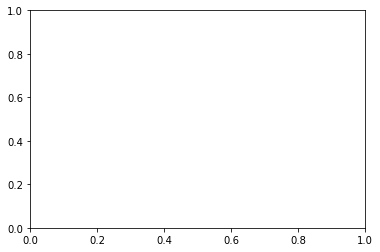

In [32]:
plt.scatter( ds['Area'] ,ds['Total Annual Compensation'] )
plt.xlabel('Area')
plt.ylabel('Compensation')
plt.show()

In [33]:
X = ds.drop('Total Annual Compensation',axis=1)
y = ds['Total Annual Compensation']

In [34]:
X.shape , y.shape

((52839, 1), (52839,))

In [35]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((42271, 1), (10568, 1), (42271,), (10568,))

In [36]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Distributed Systems (Back-End)'

In [20]:
pred = lr.predict(X_test)
pred

array([468818.87155342, 253625.74151214, 315109.4929525 , ...,
       212636.57388523, 181894.69816505, 171647.40625832])

In [21]:
Y_test

52198    1716000
48650     411000
21461     333000
7089      410000
10980     140000
          ...   
40824     242000
23808     140000
43202     152000
39068     239000
31894     210000
Name: Total Annual Compensation, Length: 10568, dtype: int64

In [22]:
diff = Y_test - pred

In [23]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,1716000.0,468818.871553,1.247181e+06
1,411000.0,253625.741512,1.573743e+05
2,333000.0,315109.492953,1.789051e+04
3,410000.0,212636.573885,1.973634e+05
4,140000.0,171647.406258,-3.164741e+04
...,...,...,...
10563,242000.0,263873.033419,-2.187303e+04
10564,140000.0,222883.865792,-8.288387e+04
10565,152000.0,212636.573885,-6.063657e+04
10566,239000.0,181894.698165,5.710530e+04


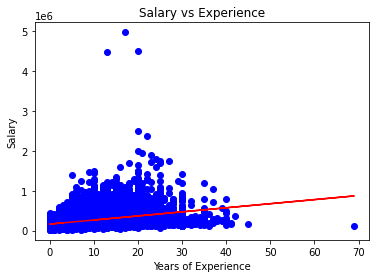

In [24]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

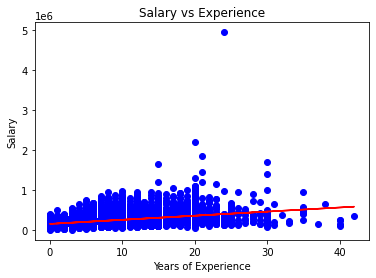

In [25]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [26]:
lr.score(X_test , Y_test)

0.20040664788127294